## MNIST with CNN

#### Major imports

In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import keras
from keras.utils.np_utils import to_categorical

C:\Users\raghu\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.models import Sequential,Model
from keras.optimizers import RMSprop

In [3]:
from keras.layers import Reshape

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
print("Shape of training data: {}".format(train.shape))
print("Shape of testing data: {}".format(test.shape))


Shape of training data: (42000, 785)
Shape of testing data: (28000, 784)


In this notebook, there are three main parts - 
1. Data Preparation
2. CNN modelling and evaluation
3. Prediction

#### Data Preparation

In [6]:
# removing the "label" from the training set
y_train = train['label']

# drop label from train
del train['label']


# feed into X_train
x_train = train

del train

C:\Users\raghu\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


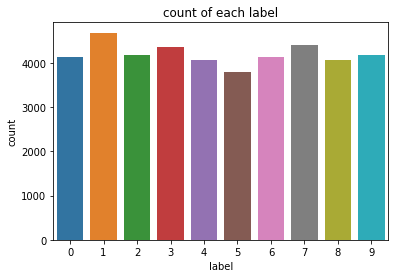

In [7]:
x = sns.countplot(y_train)
plt.title("count of each label");

In [8]:
# sum(pd.isnull(x_train["pixel0"]))/len(X_train["pixel0"])

In [9]:
#check the percentage of nulls in each of the 
x_train.apply(lambda x: sum(pd.isnull(x))/len(x))

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
pixel6      0.0
pixel7      0.0
pixel8      0.0
pixel9      0.0
pixel10     0.0
pixel11     0.0
pixel12     0.0
pixel13     0.0
pixel14     0.0
pixel15     0.0
pixel16     0.0
pixel17     0.0
pixel18     0.0
pixel19     0.0
pixel20     0.0
pixel21     0.0
pixel22     0.0
pixel23     0.0
pixel24     0.0
pixel25     0.0
pixel26     0.0
pixel27     0.0
pixel28     0.0
pixel29     0.0
           ... 
pixel754    0.0
pixel755    0.0
pixel756    0.0
pixel757    0.0
pixel758    0.0
pixel759    0.0
pixel760    0.0
pixel761    0.0
pixel762    0.0
pixel763    0.0
pixel764    0.0
pixel765    0.0
pixel766    0.0
pixel767    0.0
pixel768    0.0
pixel769    0.0
pixel770    0.0
pixel771    0.0
pixel772    0.0
pixel773    0.0
pixel774    0.0
pixel775    0.0
pixel776    0.0
pixel777    0.0
pixel778    0.0
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: floa

As we see that no columns are having "null" values. 

In [10]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


#### Normalization

In [12]:
#Type 1
# no normalization or scaling
#x_train
#test

In [13]:
#Type 2
# define a scaler and then use it to transform
scaler = MinMaxScaler(feature_range=(0, 1))

x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.fit_transform(test)

In [14]:
# we can see the difference that the values have been scaled to the range of (0,1)
x_train1[56]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
# Type 3
# perform a grayscale transformation by dividing by 255

x_train2 = (x_train/255.0)
x_test2 = (test/255.0)

In [16]:
# compare this describe values with the original x_train ones, you will see the difference in the max values
x_train2.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000860,0.000459,0.000231,0.000079,0.000068,0.000011,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024756,0.018172,0.012841,0.006901,0.007429,0.001625,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


#### Reshape

In [17]:
def con_shape(data):
    '''
    A function to convert the shape of any 1-D pandas dataframe/1-D array into a 3-D shaped array
    -1 = number of training parameters are the same. 
    28 = len of pixel
    28 = breadth of pixel
    1 = 3rd dimension of the digit
    '''
    if type(data) == pd.core.frame.DataFrame:
        data = data.values.reshape(-1,28,28,1)
    else:
        data = data.reshape(-1,28,28,1)
    
    return data

In [18]:
# convert them into 3-d digits rather than present 1-d ones. 
x_train1 = con_shape(x_train) # no transformation
x_train2 = con_shape(x_train1) # only scaled to 0-1
x_train3 = con_shape(x_train2) # grayscaled 

# for test now
x_test1 = con_shape(test) # no transformation
x_test2 = con_shape(x_test1) # only scaled to 0-1
x_test3 = con_shape(x_test2) # grayscaled 


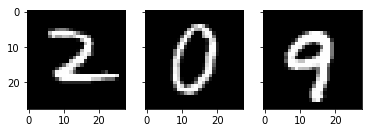

In [19]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True)
# Type 1
ax1.imshow(x_train1[56][:,:,0], cmap="gray")

# # Type 2
ax2.imshow(x_train2[5][:,:,0], cmap='gray')

# # Type 3
ax3.imshow(x_train3[554][:,:,0], cmap="gray")


We are going to choose the x_train1 as our reference training set - which was grayscaled. 


In [20]:
mx_train = x_train2 

del x_train1,x_train2,x_train3

#### Label Encoding

In [21]:
%%time
# type-1 = using pandas get_dummies and then converting them into array.
# we will covert the response label into one hot vectors
y_tp = pd.get_dummies(y_train)
np.asarray(y_tp)

Wall time: 18 ms


In [22]:
%%time
# type-2 = using the keras to_categorical so that you get arrays directly. (more time effecient)
y_tm = to_categorical(y_train, num_classes=10)
(y_tm)

Wall time: 1.99 ms


In [23]:
y_train = y_tm

del y_tm, y_tp

#### Splitting the data

In [24]:
# seed set
np.random.seed(2)
random_seed = 2

In [25]:
# splitting
mx_train, x_valid, my_train, y_valid = train_test_split(mx_train, y_train, test_size = 0.1, random_state = random_seed)

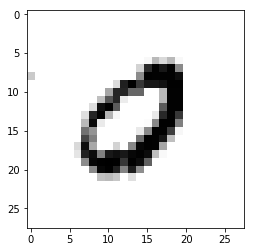

In [26]:
# Let us see the distorted image from the actual training set
plt.imshow(mx_train[8][:,:,0], cmap="gray_r")

You can see above that the images have become a bit of distorted then before because we have split the data into two. Similarly, the validation set. 

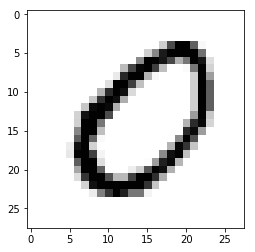

In [27]:
# validation set
plt.imshow(x_valid[9][:,:,0], cmap="gray_r")

#### CNN model 

There are several layers which we are going to add to our model. 
1. Convolutional 2-D layer - 
It is like a set of learnable filters. 32 filters for the two firsts conv2D layers and 64 filters for the two last ones were chosen. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

2. 2-D Pooling layer - 
This is a (MaxPool2D) layer.This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. 
Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

3. Dropout - 
Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting.

4. Activation layer - 
'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

5. Flattening layer - 
The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

6. A final softmax activation function




In [28]:
# Set the CNN model 
# the CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()


model.add(Conv2D(filters = 32,kernel_size=(5,5), padding = 'same',activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters = 32,kernel_size=(5,5), padding = 'same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters = 64,kernel_size=(3,3), padding = 'same',activation='relu'))
model.add(Conv2D(filters = 64,kernel_size=(3,3), padding = 'same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides = (2,2)))
model.add(Dropout(rate=0.25))

In [29]:
# model.summary()
model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [31]:
model.add(Dense(10, activation = 'softmax'))

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

#### Optimizer and learning rate set-ip

This is to set up a score function, a loss function and an optimisation algorithm. 

1. Loss function - 
It is the error rate between the oberved labels and the predicted ones. We use a specific form for categorical classifications (>2 classes) called the "categorical_crossentropy".

2. Optimizer - 
RMSprop turns out to be a very effective optimizer. We will also try out other optimizers later. The RMSProp update adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing learning rate. We could also have used Stochastic Gradient Descent ('sgd') optimizer, but it is slower than RMSprop.

3. Evaluation - 
The metric function "accuracy" is used is to evaluate the performance our model. 

In [33]:
# first we define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [34]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])

In order to make the optimizer converge faster and closest to the global minimum of the loss function, we will use a new method named **Annealing** method of the learning rate (LR).

The LR is the step by which the optimizer walks through the 'loss landscape'. The higher LR, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima.Its better to have a decreasing learning rate during the training to reach efficiently the global minimum of the loss function.

To keep the advantage of the fast computation time with a high LR, we decreas the LR dynamically every X steps (epochs) depending if it is necessary (when accuracy is not improved).

With the **ReduceLROnPlateau** function from Keras.callbacks, i choose to reduce the LR by half if the accuracy is not improved after 3 epochs.

In [35]:
from keras.callbacks import ReduceLROnPlateau

In [36]:
lr_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [37]:
epochs = 5
batch_size = 64


#### Data Augmentation


In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit. 

Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.

The improvement is important :

- Without data augmentation i obtained an accuracy of 98.114%
- With data augmentation i achieved 99.67% of accuracy


In [38]:
from keras.preprocessing.image import ImageDataGenerator

In [39]:
# applying data augmentation
im_datagen = ImageDataGenerator(featurewise_center=False, # set each input mean to 0 over dataset
                                samplewise_center=False,  # set each sample mean to zero
                                featurewise_std_normalization=False, # divide by std over dataset
                                samplewise_std_normalization=False,# divide by std for each sample
                                zca_whitening= False, # apply ZCA whiteninig
                                rotation_range= 10, # rotate by 10 degress
                                zoom_range= 0.1, # randomly zoom
                                width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                horizontal_flip=False,  # randomly flip images
                                vertical_flip=False  # randomly flip images
                                ) 
                                

In [40]:
im_datagen.fit(mx_train)


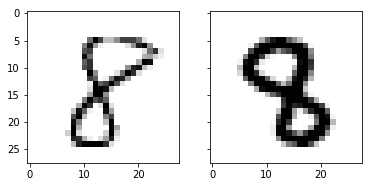

In [86]:
# Let us see the changed images from the actual training set
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# zoom in 
ax1.imshow(mx_train[3150][:,:,0], cmap="gray_r")

#rotation of image
ax2.imshow(mx_train[31509][:,:,0], cmap="gray_r")



What we did was - 

- Randomly rotate some training images by 10 degrees
- Randomly Zoom by 10% some training images
- Randomly shift images horizontally by 10% of the width
- Randomly shift images vertically by 10% of the height

We did not vertically and horizontally fit the images, may lead to mis-classification. But we will also try that later

In [92]:
# Fit the model
history = model.fit_generator(im_datagen.flow(mx_train,my_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_valid,y_valid),
                              verbose = 2, steps_per_epoch=mx_train.shape[0] // batch_size
                              , callbacks=[lr_reduction])

Epoch 1/5
 - 235s - loss: 0.1654 - acc: 0.9542 - val_loss: 0.0466 - val_acc: 0.9860
Epoch 2/5
 - 251s - loss: 0.1474 - acc: 0.9591 - val_loss: 0.0532 - val_acc: 0.9857
Epoch 3/5
 - 274s - loss: 0.1364 - acc: 0.9639 - val_loss: 0.0477 - val_acc: 0.9855
Epoch 4/5
 - 248s - loss: 0.1462 - acc: 0.9635 - val_loss: 0.0487 - val_acc: 0.9855

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/5
 - 259s - loss: 0.1094 - acc: 0.9736 - val_loss: 0.0334 - val_acc: 0.9890


We got the training accuracy as 97.36%, which is good. Let us plot these to get a better understanding of the evaluation techniques. It shows how our model has not overfitted. 


#### Evaluation

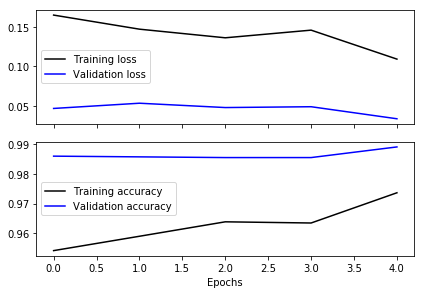

In [113]:
## Traning and validation curves

f, ax = plt.subplots(2,1, sharex=True)

ax[0].plot(history.history['loss'], color='k', label="Training loss")
ax[0].plot(history.history['val_loss'], color = "b", label = "Validation loss")

ax[0].legend(loc = 'best')

ax[1].plot(history.history['acc'], color='k', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color = "b", label = "Validation accuracy")

ax[1].legend(loc = 'best')
plt.tight_layout()
plt.xlabel("Epochs");

So validation/testing accuracy after 5 epochs = 98.9%. Wow, amazing!

#### Confusion Matrix

In [131]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
# plot_confusion_matrix(con_matrix, classes=range(10))

In [132]:
# con_matrix.max()/2

#### Predictions 

In [115]:
# predict values using x_valid
y_pred = model.predict(x_valid)

# convert them into one-hot 
y_pred_classes = np.argmax(y_pred, axis=1)

In [116]:
y_pred

array([[6.3449712e-10, 6.0024005e-16, 4.4049923e-15, ..., 2.0944573e-18,
        2.4957947e-09, 7.9887209e-13],
       [6.3298504e-13, 5.9006605e-11, 5.6497336e-09, ..., 1.8020182e-05,
        9.0425267e-05, 9.9377078e-01],
       [2.0196462e-16, 4.4357659e-15, 3.8991951e-17, ..., 9.7645552e-15,
        2.8356234e-10, 4.5635065e-11],
       ...,
       [9.2083916e-16, 5.5336222e-14, 1.0000000e+00, ..., 1.1171543e-11,
        2.5509744e-12, 1.1021584e-16],
       [2.5919336e-08, 1.1651757e-05, 9.9892718e-01, ..., 1.0330557e-03,
        2.5063579e-05, 3.8697064e-07],
       [6.3291025e-01, 3.3153772e-06, 4.7544195e-06, ..., 1.2809020e-06,
        2.7383994e-03, 6.4941378e-05]], dtype=float32)

In [117]:
y_pred_classes

array([6, 9, 5, ..., 2, 2, 0], dtype=int64)

In [121]:
y_true = np.argmax(y_valid, axis = 1)

In [124]:
# compute the confusion matrix
con_matrix = confusion_matrix(y_true, y_pred_classes)

In [125]:
con_matrix

array([[410,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 482,   0,   1,   0,   0,   0,   0,   2,   0],
       [  0,   0, 398,   1,   1,   0,   0,   2,   1,   0],
       [  0,   0,   0, 414,   0,   0,   0,   0,   4,   0],
       [  0,   0,   1,   0, 458,   0,   0,   1,   0,   1],
       [  0,   0,   0,   4,   1, 364,   2,   0,   1,   0],
       [  1,   1,   0,   0,   1,   2, 407,   0,   1,   0],
       [  0,   0,   1,   0,   0,   0,   0, 445,   0,   0],
       [  0,   1,   1,   0,   2,   1,   0,   0, 376,   1],
       [  1,   0,   0,   0,   5,   0,   0,   3,   0, 400]], dtype=int64)

In [134]:
import itertools
from itertools import product

<Figure size 1368x648 with 0 Axes>

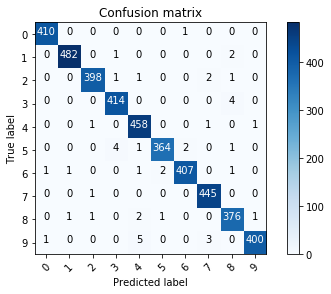

In [137]:
plot_confusion_matrix(con_matrix, classes=range(10))
plt.Figure(figsize=(19,9))

Here we can see that our CNN performs very well on all digits with few errors considering the size of the validation set (4 200 images).

However, it seems that our CNN has some little troubles with the 4 digits, hey are misclassified as 9. Sometime it is very difficult to catch the difference between 4 and 9 when curves are smooth.

#### Error investigation

In [138]:
# define errors
error = (y_pred_classes - y_true != 0)

In [139]:
# find errors in all 
y_pred = y_pred[error]
# y_pred

array([[1.47815854e-06, 1.05597333e-04, 4.07687097e-04, 1.68004131e-04,
        6.38598064e-03, 1.24056942e-05, 3.33314709e-08, 6.87572896e-01,
        2.01800576e-04, 3.05144042e-01],
       [1.10856592e-04, 1.34770689e-03, 7.17188418e-03, 1.93275716e-02,
        2.69587617e-03, 7.75521388e-04, 1.37400548e-05, 9.56956923e-01,
        2.18307576e-03, 9.41681862e-03],
       [1.10192732e-05, 6.01987820e-03, 2.94489873e-04, 5.63634167e-05,
        4.59375158e-02, 4.43213612e-05, 3.46417210e-06, 1.53806016e-01,
        6.18119426e-02, 7.32015014e-01],
       [1.36397693e-08, 1.38821615e-05, 4.61425304e-01, 5.32076001e-01,
        1.26343075e-05, 1.35611635e-05, 7.22140953e-07, 2.24812003e-03,
        4.18419391e-03, 2.55800696e-05],
       [4.86199558e-03, 2.49300342e-07, 2.10659364e-05, 1.12996865e-02,
        5.51271796e-07, 9.91454581e-04, 2.98562343e-04, 8.52746143e-06,
        9.82500076e-01, 1.77571710e-05],
       [1.50953085e-04, 1.75150242e-04, 4.43301309e-04, 2.20813348e-07,
   

In [140]:
y_true_e = y_true[error]
x_valid_e = x_valid[error]
y_pred_classes_e = y_pred_classes[error]

In [147]:
# taking the maximum of probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(y_pred,axis = 1)
Y_pred_errors_prob

array([0.6875729 , 0.9569569 , 0.732015  , 0.532076  , 0.9825001 ,
       0.83498853, 0.35285532, 0.99193   , 0.9708887 , 0.34227914,
       0.9998454 , 0.65356314, 0.6215773 , 0.6040248 , 0.93832785,
       0.47402516, 0.61881596, 0.48341334, 0.54873425, 0.6178664 ,
       0.65756637, 0.5181379 , 0.997251  , 0.44789705, 0.94372845,
       0.7256665 , 0.5136955 , 0.6169201 , 0.80327547, 0.57150555,
       0.9872089 , 0.9666958 , 0.6197451 , 0.9865665 , 0.6324286 ,
       0.5147765 , 0.99308866, 0.6317541 , 0.7324792 , 0.96640855,
       0.97247654, 0.52131605, 0.9295576 , 0.93043715, 0.52885705,
       0.63291025], dtype=float32)

In [148]:
# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(y_pred, y_true_e, axis=1))

true_prob_errors

array([3.0514404e-01, 9.4168186e-03, 6.1811943e-02, 4.6142530e-01,
       9.9145458e-04, 1.6223878e-01, 3.4070092e-01, 6.8808552e-03,
       2.8402546e-02, 3.0693492e-01, 1.0982953e-04, 3.3744067e-01,
       1.4964224e-01, 3.9122570e-01, 6.3155815e-03, 3.8705897e-01,
       3.7036961e-01, 3.9734852e-01, 2.2918095e-01, 3.8196239e-01,
       3.2720029e-01, 9.7285040e-02, 2.6690832e-03, 3.6100769e-01,
       5.6142803e-02, 2.7060395e-01, 4.8623374e-01, 3.5578921e-01,
       2.8827220e-02, 4.2841297e-01, 1.2744657e-02, 2.6718115e-03,
       1.8129924e-01, 1.2044828e-02, 3.6691341e-01, 3.2987818e-01,
       6.8595689e-03, 2.6355228e-01, 2.6041630e-01, 2.6990792e-02,
       2.7289128e-02, 4.7852528e-01, 7.0025437e-02, 6.1635841e-02,
       4.6948045e-01, 3.6412883e-01], dtype=float32)

In [163]:
# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]
most_important_errors

array([33,  4,  7, 36, 22, 10], dtype=int64)

In [164]:
# define function to plot these 6 investigated numbers

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)), cmap = "gray")
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

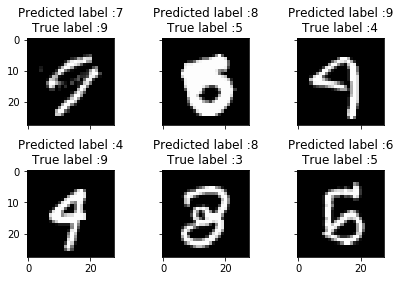

In [165]:
display_errors(most_important_errors, x_valid_e, y_pred_classes_e, y_true_e)
plt.Figure(figsize=(16,9))
plt.tight_layout()

We can cut some slack for the model as these numbers are deceptful to even a human eye. 

#### Further research


We can do the following changes to this model:
    
1. Change the optimizer for the model 
2. Apply horizontal and vertical flips (the model will be less effective but well trained for such cases)